## Data Science Salaries

### Introduction:
This analysis is done using the Data Science Salaries dataset which contains the salaries of some data science and other features that affects the salary. 

#### Questions to answer:
<ul>
    <li>What is the salary trend for Data Science Roles?</li>
    <li>What is the trend for remote jobs? Is there an increase of decline for remote jobs?</li>
    <li>What country is the highest employers of Data Science and how much is the average salary in USD? </li>
    <li>What branch of data science earns the most?</li>
</ul>

#### importing basic libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

#### reading in the data

In [2]:
data = pd.read_csv('ds_salaries.csv')

### Data Exploration 

In [3]:
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


#### checking the shape of data


In [4]:
data.shape

(607, 12)

#### checking the features(columns) present in the data

In [5]:
data.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

#### checking the statistics of the data

In [6]:
data.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


#### checking the info and datatypes of each feature

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [8]:
#dropping the Unnamed: 0 column since it does not say anything useful
data.drop(['Unnamed: 0'], axis = 1, inplace = True)
# seperating the data into numerical and categorical data
cat = [f for f in data.columns if data[f].dtype == 'object']
num = [f for f in data.columns if f not in cat]

In [9]:
print(f'categorical columns = {cat}, lenght = {len(cat)}')
print(f'categorical columns = {num}, lenght = {len(num)}')

categorical columns = ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size'], lenght = 7
categorical columns = ['work_year', 'salary', 'salary_in_usd', 'remote_ratio'], lenght = 4


## Data Visualization

### Univariate Analysis

I will begin by creating a function for plotting the categorical features 

In [10]:
def countplot(df, column, xlabel, ylabel = 'Count', label = None):
    plt.figure(figsize = (12, 10))
    sns.countplot(data = df, x = column)
    plt.xlabel(xlabel)
    plt.title(f'Count of Various {xlabel}')
    plt.ylabel(ylabel)
    if label != None:
        plt.xticks(np.arange(0,len(label)), label)
    if df[column].nunique() > 10:
        plt.xticks(rotation = 90)
    plt.show()

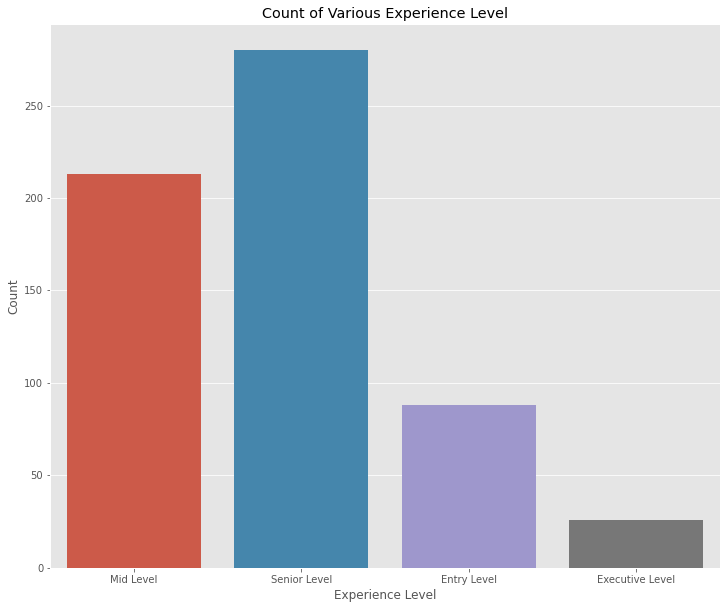

In [11]:
labels = ['Mid Level', 'Senior Level', 'Entry Level', 'Executive Level']
countplot(data, 'experience_level', 'Experience Level', label = labels)

From the above plot, you can see the experince level with most countis the Senoir level. We have just few Excecutive Level Data Scientist 

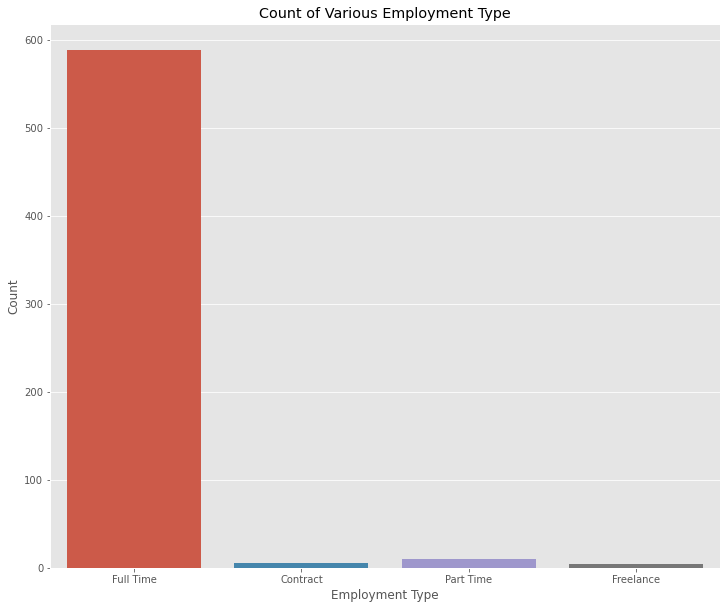

In [12]:
labels = ['Full Time', 'Contract', 'Part Time', 'Freelance']
countplot(data, 'employment_type', 'Employment Type', label = labels)

Data Scientist working full time is the most common in our dataset

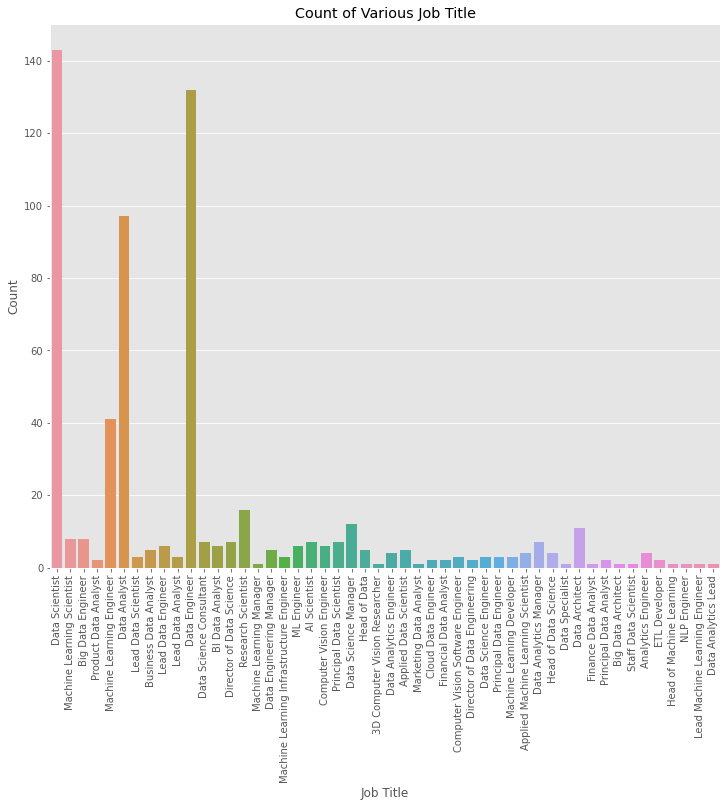

In [13]:
countplot(data, 'job_title', 'Job Title')

There are a lot of data science roles but the most common roles are the Data Scientist, Data Analyst and Data Engineer.
Since there are a lot of different data science roles, i will be grouping it into three basic categories:
Data Scientist <br>
Data Engineer <br>
Data Analyst <br>
If there are anyone left which does not fit into the above category, i will rename it to 'Others

In [14]:
# collecting data science jobs
data.job_title.loc[data.job_title.str.contains('Data Scientist')] = 'Data Scientist'
# collecting data analyst jobs
data.job_title.loc[(data.job_title.str.contains('Data Analyst')) |
                   (data.job_title.str.contains('Data Analytics'))] = 'Data Analyst'
# collecting data engineer jobs
data.job_title.loc[data.job_title.str.contains('Data Engineer')] = 'Data Engineer'
# changing the rest which does not fall into the above category to others
data.job_title = data.job_title.apply(lambda x : x if x in ['Data Scientist', 'Data Analyst', 'Data Engineer'] else 'Others')

data.job_title.value_counts()

Data Scientist    159
Others            159
Data Engineer     158
Data Analyst      131
Name: job_title, dtype: int64

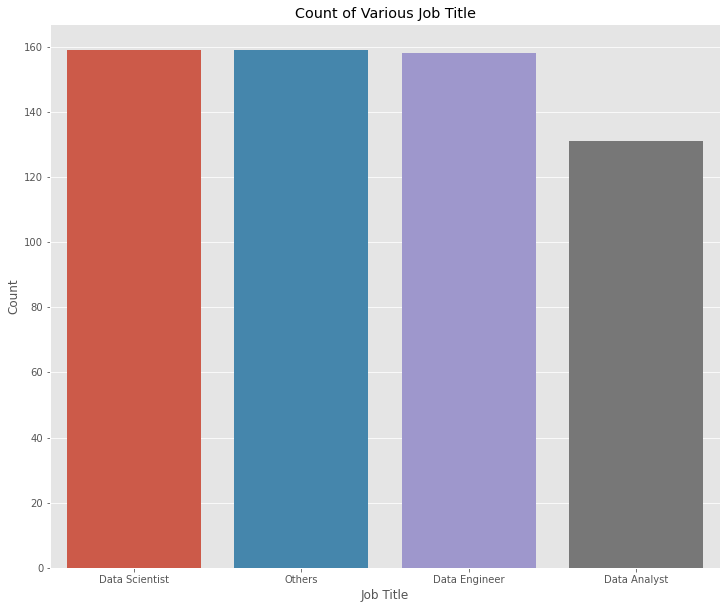

In [15]:
# replotting again to see the new job title groupings
countplot(data, 'job_title', 'Job Title')

Data Analyst seems to be the least sort after data science role

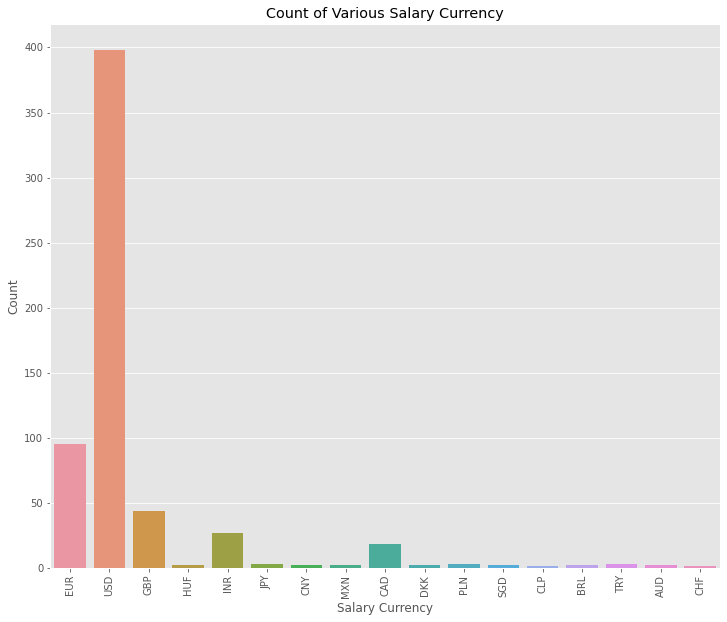

In [16]:
countplot(data, 'salary_currency', 'Salary Currency')

Most Data Science roles are paid in USD (United States Dollar)

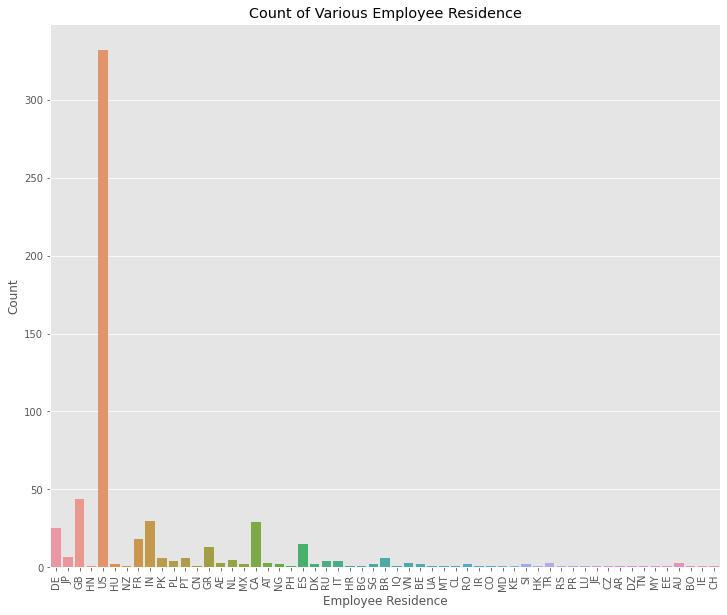

In [17]:
countplot(data, 'employee_residence', 'Employee Residence')

Majority of the Data Scientist reside in the US

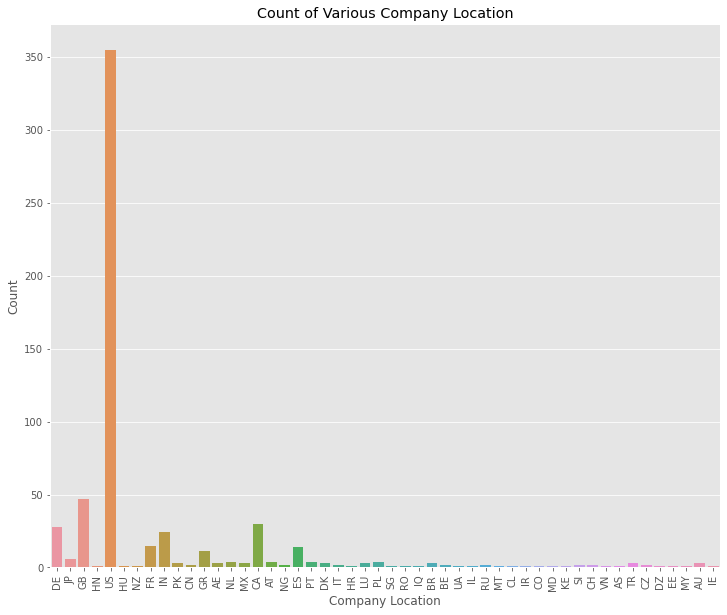

In [18]:
countplot(data, 'company_location', 'Company Location')

Most of the employing companies are located in the US

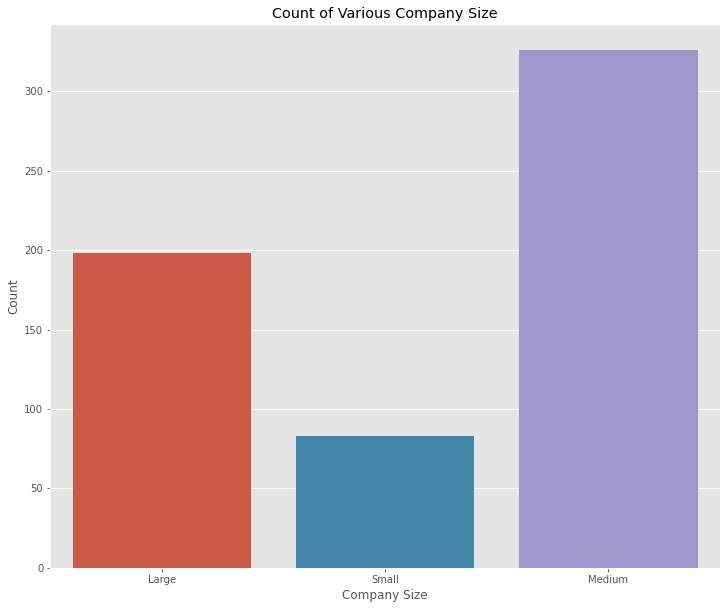

In [19]:
countplot(data, 'company_size', 'Company Size', label = ['Large', 'Small', 'Medium'])

Medium Sized companies are the most common and Small Sized company being the least common

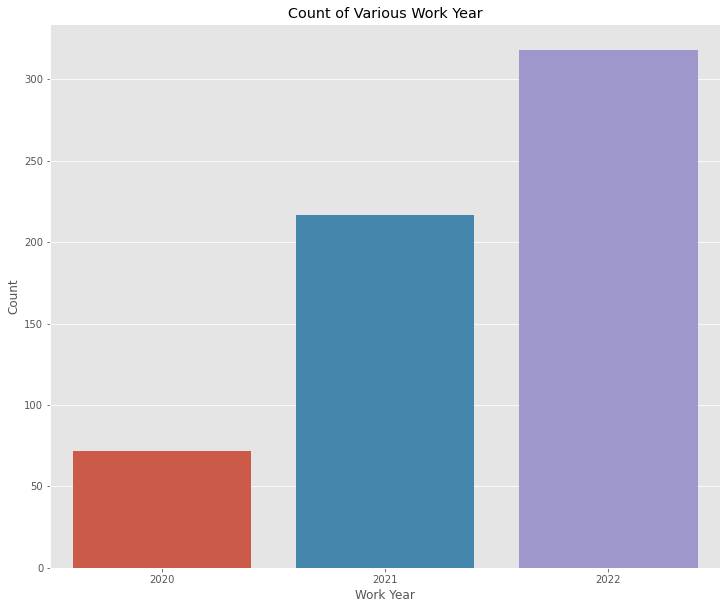

In [20]:
countplot(data, 'work_year', 'Work Year')

Most Data Science jobs were in the Year 2022

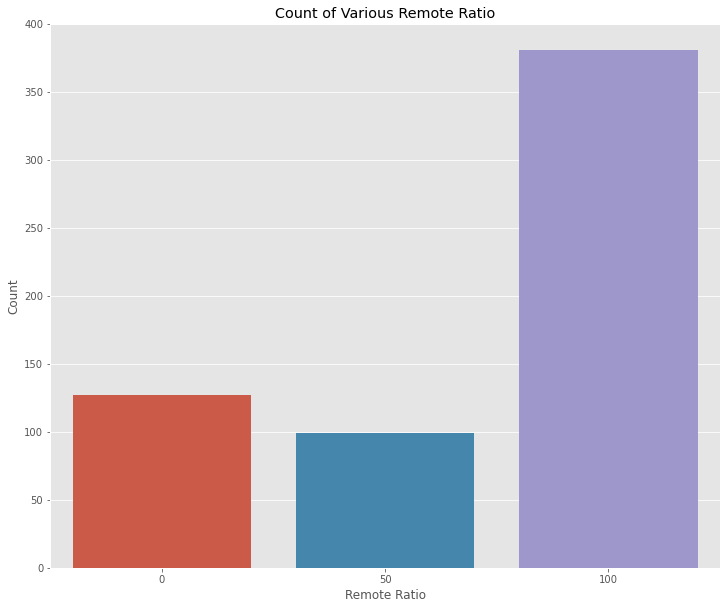

In [21]:
countplot(data, 'remote_ratio', 'Remote Ratio')

Most companies allow remote workers

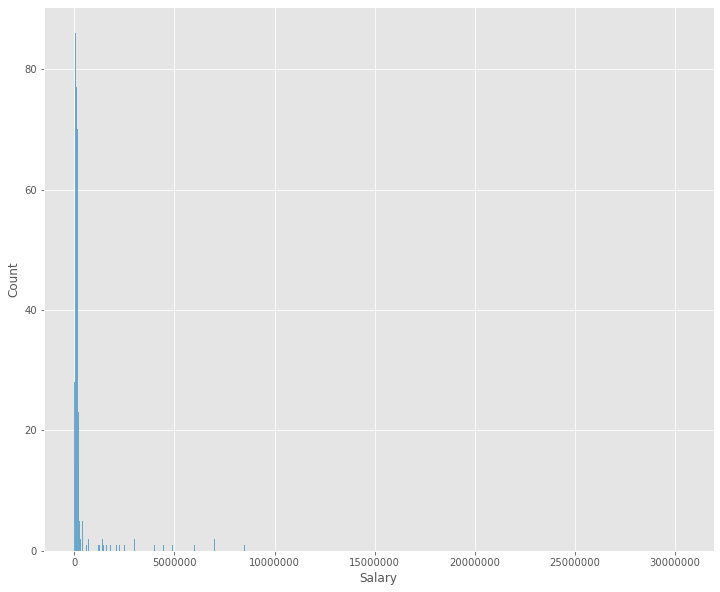

In [22]:
plt.figure(figsize = (12, 10))
sns.histplot(data['salary'])
plt.xlabel('Salary')
plt.ylabel('Count')
plt.ticklabel_format(style='plain')
plt.show()

Recall during the statistical analysis, the minimun salary was 4000, so i will plot salaries from 4,000 to 5,000,000

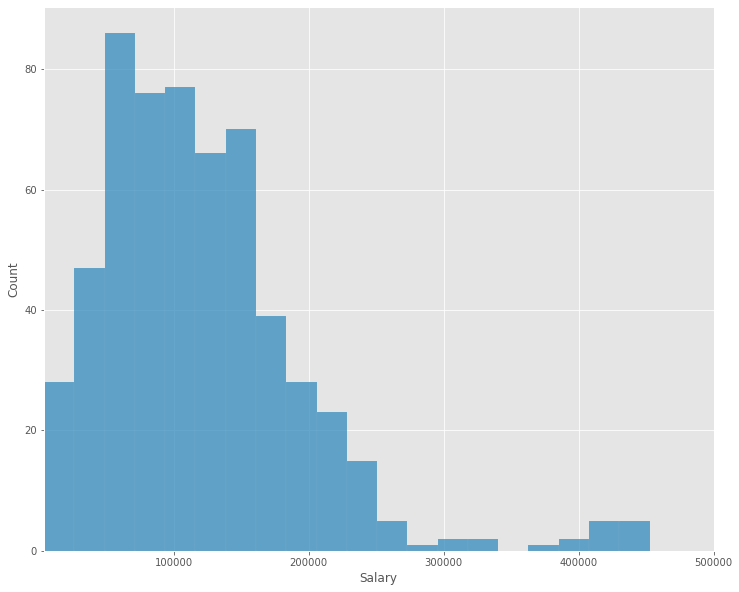

In [23]:
plt.figure(figsize = (12, 10))
sns.histplot(data['salary'])
plt.xlabel('Salary')
plt.ylabel('Count')
plt.xlim([4000, 500000]) # reducing the range of salaries
plt.ticklabel_format(style='plain')
plt.show()

From this plot, you can see that the salary is left skewed with salaries mostly around 100,000

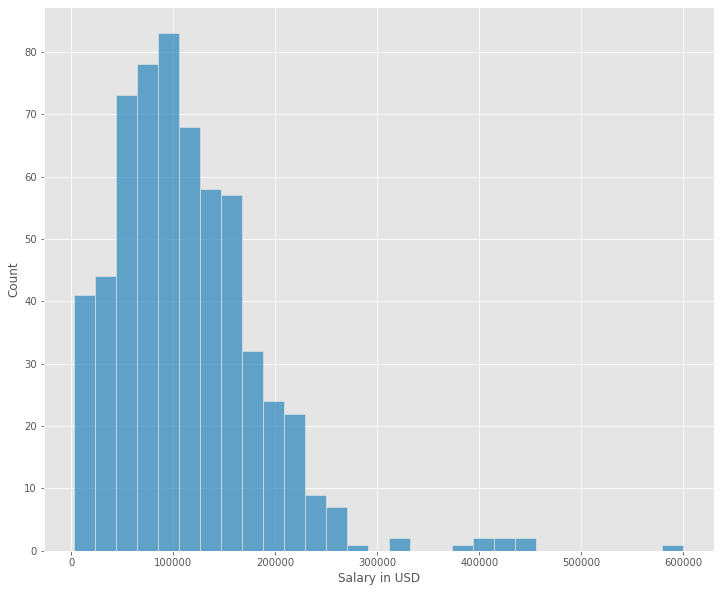

In [24]:
plt.figure(figsize = (12, 10))
sns.histplot(data['salary_in_usd'])
plt.xlabel('Salary in USD')
plt.ylabel('Count')
plt.ticklabel_format(style='plain')
plt.show()

The salary paid in USD is left skewed. There are some very high salaries of 600,000 but mostly around the 100,000 usd 

### Bivariate Analysis

First I will be checking the Pairwise correlation

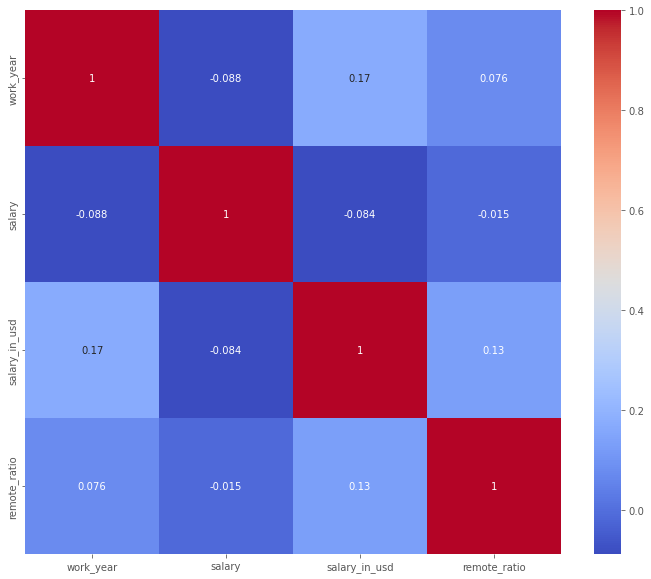

In [25]:
plt.figure(figsize = (12, 10))
corr = data.corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.show()

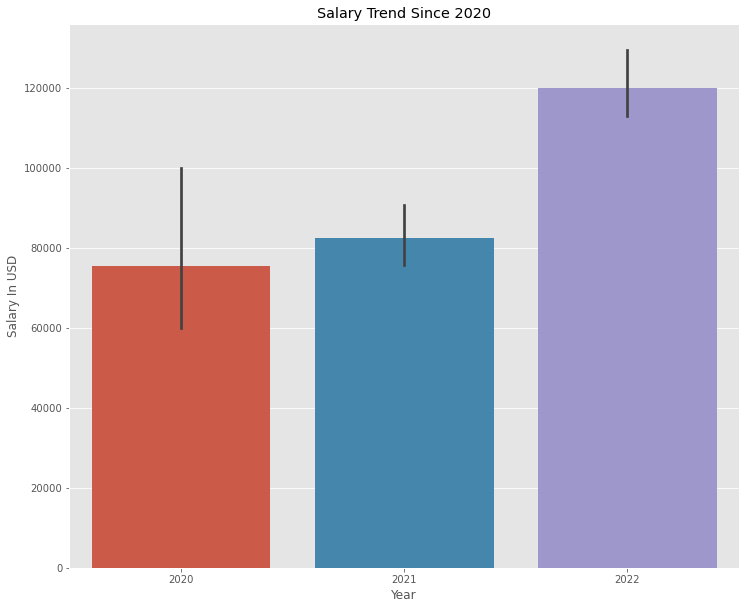

In [26]:
# check the trend of salary in usd for the since 2020
plt.figure(figsize = (12, 10))
sns.barplot(data = data, x = 'work_year', y = 'salary_in_usd', estimator = np.median)
plt.title('Salary Trend Since 2020')
plt.xlabel('Year')
plt.ylabel('Salary In USD')
plt.show()

From the above plot, we can see that the median Salary has increase since 2020

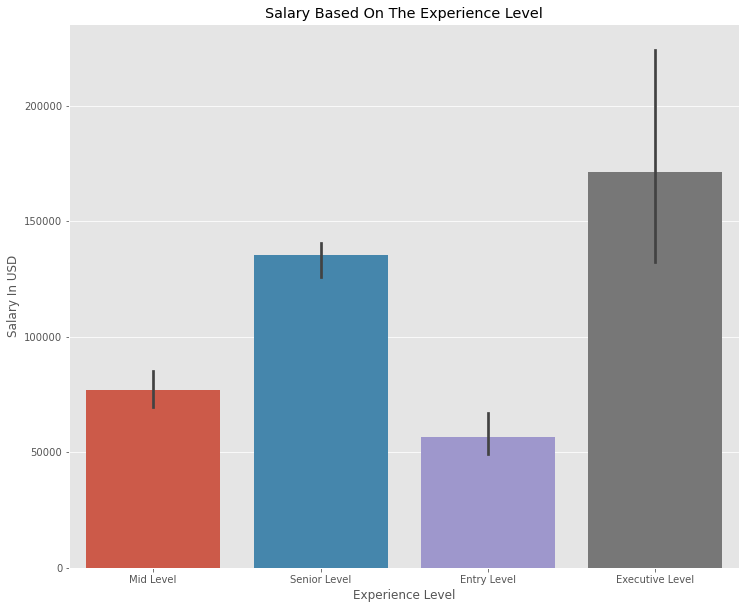

In [27]:
# checking the salary and experience level
plt.figure(figsize = (12, 10))
sns.barplot(data = data, x = 'experience_level', y = 'salary_in_usd', estimator = np.median)
plt.title('Salary Based On The Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary In USD')
plt.xticks(np.arange(0,4),labels = ['Mid Level', 'Senior Level', 'Entry Level', 'Executive Level'])
plt.show()

From the above plot, we can see that those classified as having an expert or executive level earn over 150,000, the least earners are the Entry Level Data Scientist

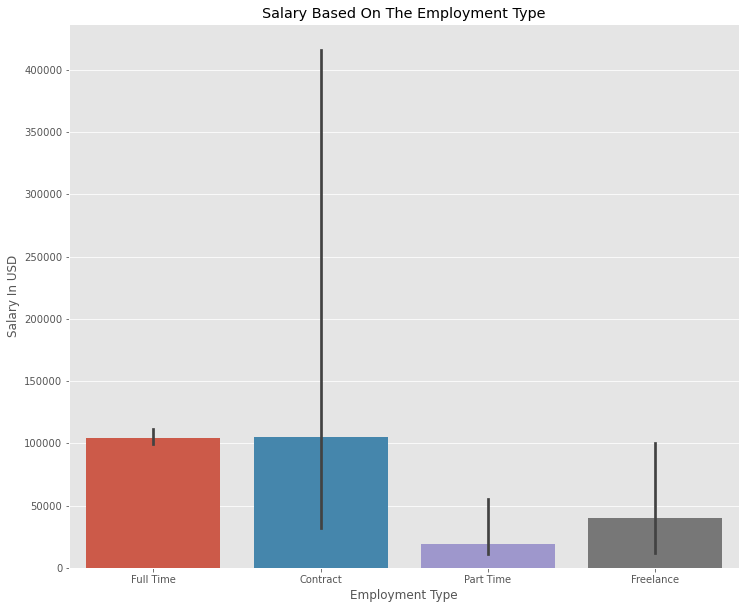

In [52]:
# checking how much a data scientist can earn based on the type of employment
plt.figure(figsize = (12, 10))
sns.barplot(data = data, x = 'employment_type', y = 'salary_in_usd', estimator = np.median)
plt.title('Salary Based On The Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Salary In USD')
plt.xticks(np.arange(0,4),labels = ['Full Time', 'Contract', 'Part Time', 'Freelance'])
plt.show()

Data Scientist who are hired on a Contract basis tend to have a large range of earnings. But basically, it is safe to say that they earn more on an average compared to the Full Time Data Scientist.

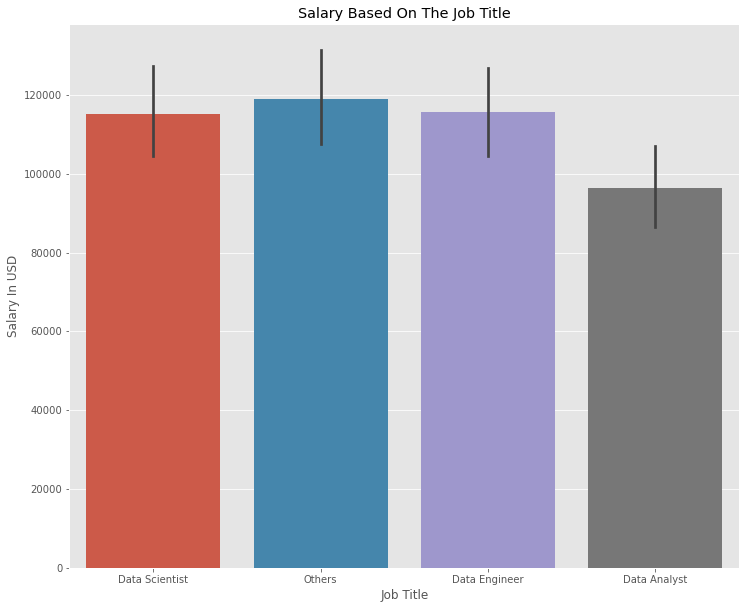

In [68]:
# checking how much a data scientist can earn based on the type of employment
plt.figure(figsize = (12, 10))
sns.barplot(data = data, x = 'job_title', y = 'salary_in_usd')
plt.title('Salary Based On The Job Title')
plt.xlabel('Job Title')
plt.ylabel('Salary In USD')
plt.show()

On an average we can see that the Data Science pays more, but it is important to note that other roles have a long range of salaries <br> 
The Data Engineer role has the longest range of over 600,000

In [30]:
# collecting remote jobs
data['remote_jobs'] = None
data['remote_jobs'].loc[data.employee_residence == data.company_location] = 'No'
data['remote_jobs'].loc[data.employee_residence != data.company_location] = 'Yes'

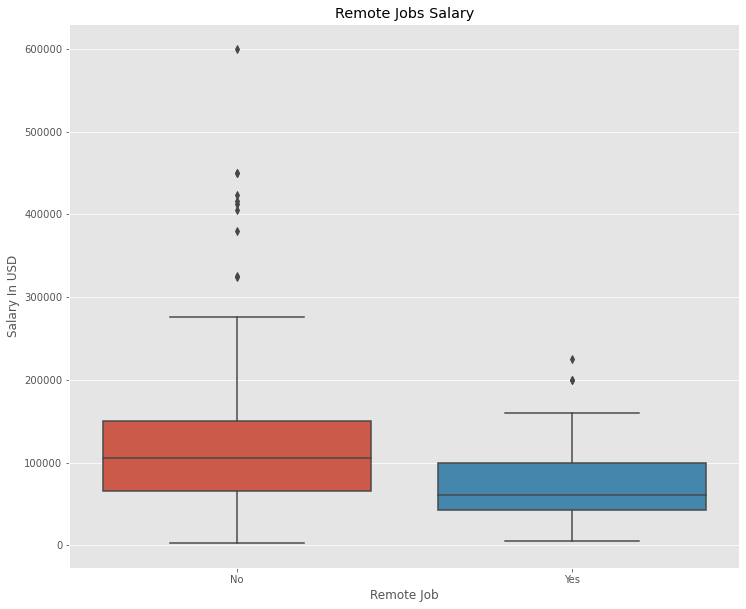

In [31]:
# checking how much a data scientist can earn based on the type of employment (Remote or Not Remote)
plt.figure(figsize = (12, 10))
sns.boxplot(data = data, x = 'remote_jobs', y = 'salary_in_usd')
plt.title('Remote Jobs Salary')
plt.xlabel('Remote Job')
plt.ylabel('Salary In USD')
plt.show()

Non Remote Jobs are paid more compared to Remote jobs

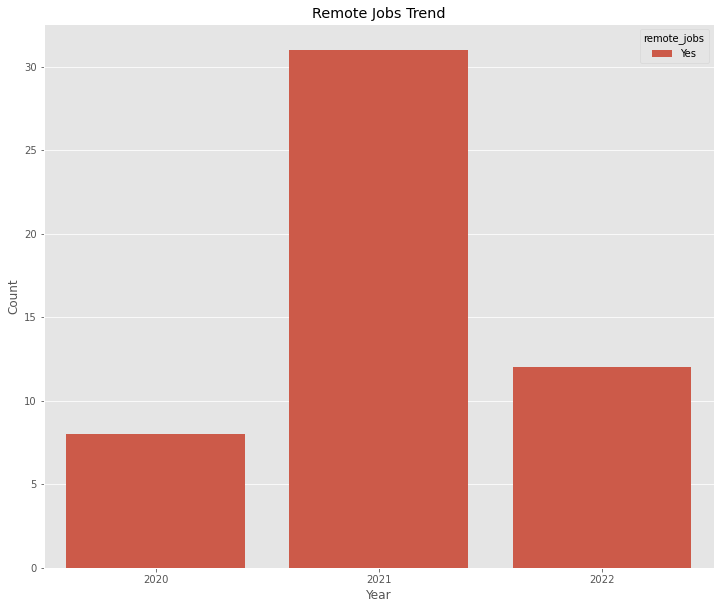

In [55]:
# collecting the records of remote jobs in the dataset
remote_jobs = data.loc[data.remote_jobs == 'Yes']
# plotting the cases of remote jobs only
plt.figure(figsize = (12, 10))
sns.countplot(data = remote_jobs, x = 'work_year', hue = 'remote_jobs')
plt.title('Remote Jobs Trend')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

Remote job was highest at 2021 maybe because of the increase in Covid-19. So we can say that since the drop in Covid-19 cases, remote jobs drop again. But we should also note that the data was collected from only the first half of the year, so therefore reomote jobs in 2022 is expected to rise.

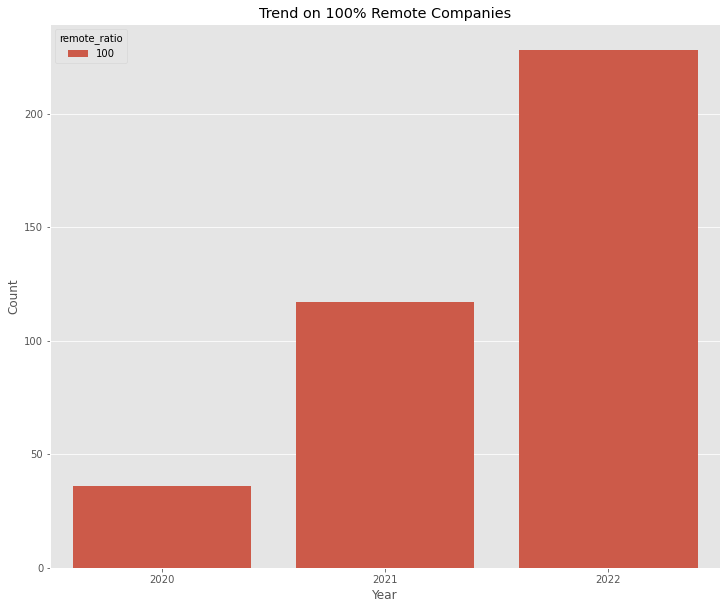

In [57]:
# collecting cases companies with 100% remote jobs
remote_ratio = data.loc[data.remote_ratio == 100]
plt.figure(figsize = (12, 10))
sns.countplot(data = remote_ratio, x = 'work_year', hue = 'remote_ratio')
plt.title('Trend on 100% Remote Companies')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

We can see that there is an increase in companies who are 100% remote. 

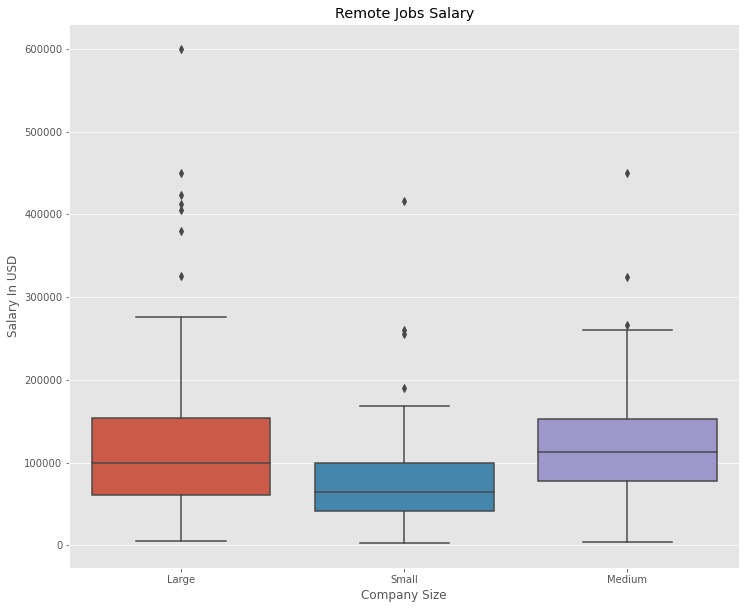

In [32]:
# checking how much a data scientist can earn based on the type of employment
plt.figure(figsize = (12, 10))
sns.boxplot(data = data, x = 'company_size', y = 'salary_in_usd')
plt.title('Remote Jobs Salary')
plt.xlabel('Company Size')
plt.ylabel('Salary In USD')
plt.xticks(np.arange(0,3), ['Large', 'Small', 'Medium'])
plt.show()

Medium sized companies pays more on an average but Large sized companies have a larger range of salaries compared to the rest

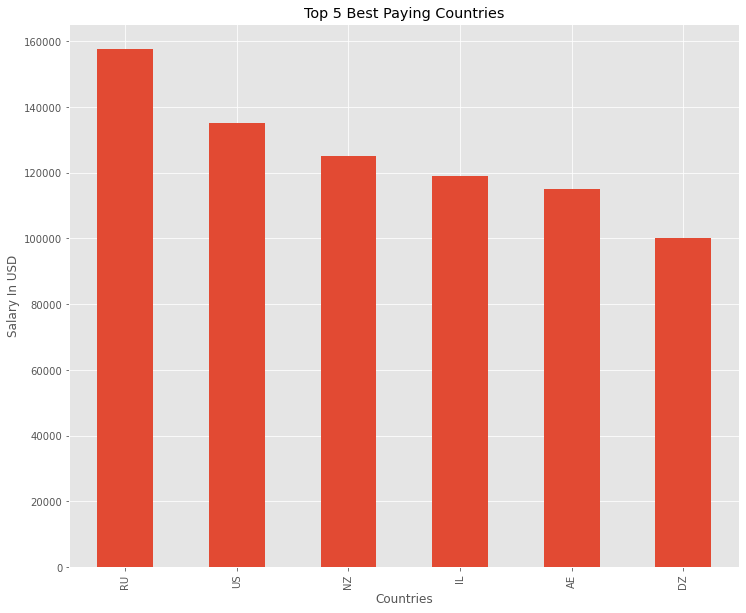

In [33]:
plt.figure(figsize = (12, 10))
data.groupby('company_location')['salary_in_usd'].median().sort_values(ascending = False)[:6].plot(kind = 'bar')
plt.title('Top 5 Best Paying Countries')
plt.xlabel('Countries')
plt.ylabel('Salary In USD')
plt.show()

Russsia is the highest Paying Country on an average followed by the United States.